In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from bokeh.plotting import figure, output_file, show, gridplot
from bokeh.models import NumeralTickFormatter
from bokeh.io import output_notebook

In [3]:
output_notebook()

Loading BokehJS ...

In [4]:
%%bash

head -19 ../data/cyclic_punish_data/run-3-average.dat
head -19 ../data/cyclic_punish_data/run-3-dominant.dat
head -19 ../data/cyclic_punish_data/run-3-count.dat
head -33 ../data/cyclic_punish_data/run-3-instruction.dat
head -8 ../data/cyclic_punish_data/run-3-resource.dat
head -14 ../data/cyclic_punish_data/run-3-cur_reactions.dat

# Avida Average Data
# Fri Feb  3 12:55:35 2017
#  1: Update
#  2: Merit
#  3: Gestation Time
#  4: Fitness
#  5: Repro Rate?
#  6: Size
#  7: Copied Size
#  8: Executed Size
#  9: Abundance
# 10: Proportion of organisms that gave birth in this update
# 11: Proportion of Breed True Organisms
# 12: Genotype Depth
# 13: Generation
# 14: Neutral Metric
# 15: Lineage Label
# 16: True Replication Rate (based on births/update, time-averaged)

# Avida Dominant Data
# Wed Feb  1 16:44:16 2017
#  1: Update
#  2: Average Merit of the Dominant Genotype
#  3: Average Gestation Time of the Dominant Genotype
#  4: Average Fitness of the Dominant Genotype
#  5: Repro Rate?
#  6: Size of Dominant Genotype
#  7: Copied Size of Dominant Genotype
#  8: Executed Size of Dominant Genotype
#  9: Abundance of Dominant Genotype
# 10: Number of Births
# 11: Number of Dominant Breed True?
# 12: Dominant Gene Depth
# 13: Dominant Breed In
# 14: Max Fitness?
# 15: Genotype ID of Dominant Genotype
# 16: Name of th

In [4]:
def merge_reps(path, file, columns, col, skiprows=None):

    df_1 = pd.read_csv("../data/%s/run-1-%s.dat" %(path, file),
                       delimiter=' ', skiprows=skiprows, header=None)

    df_1.columns = columns
    df_1 = df_1.dropna(axis=1)

    merge_reps = df_1[['update',col]].copy()
    merge_reps.columns = ["update",col+"_1"]

    for i in range(2,51):
        
        try:
            df = pd.read_csv("../data/%s/run-%s-%s.dat" %(path, i, file),
                             delimiter=' ', skiprows=skiprows, header=None)
        except FileNotFoundError:
            continue

        df.columns = columns
        df = df.dropna(axis=1)

        merge_reps[col+'_%s' %i] = df[col]
        
    return merge_reps

In [6]:
columns = ['update','merit','gestation_time','fitness','repro_rate',
           '(deprecated)_size','copied_size','executed_size',
           '(deprecated)_abundance','proportion_of_organisms_that_gave_birth_in_this_update',
           'proportion_of_breed_true_organisms','(deprecated)_genotype_depth',
           'generation','neutral_metric','lineage_label',
           'true_replication_rate_(based_on_births/update_time-averaged)','']

fitness_cyc = merge_reps(path='cyclic_zero_data', file='average',
                         columns=columns, col='fitness', skiprows=19)

fitness_cyc_not = merge_reps(path='cyclic_notzero_data', file='average',
                         columns=columns, col='fitness', skiprows=19)

fitness_pun = merge_reps(path='punish_value_data', file='average',
                         columns=columns, col='fitness', skiprows=19)

fitness_cp = merge_reps(path='cyclic_punish_data', file='average',
                         columns=columns, col='fitness', skiprows=19)

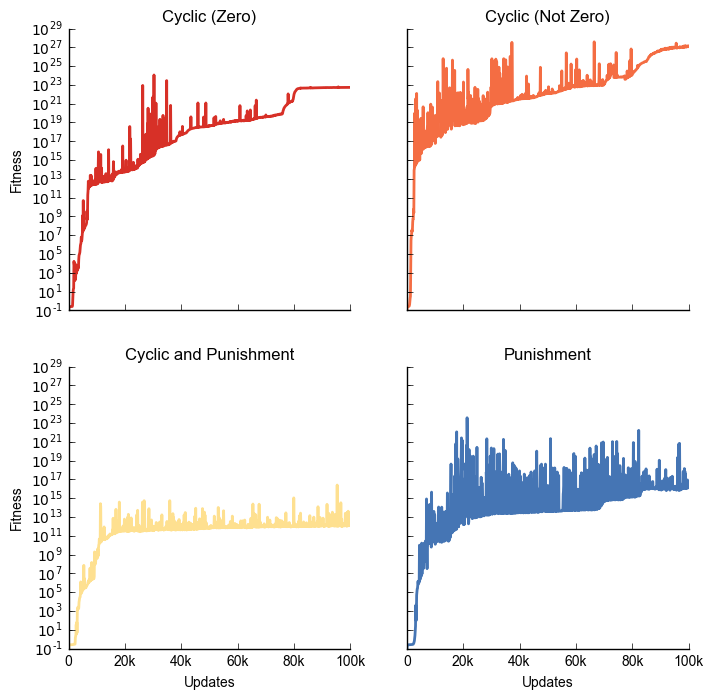

In [7]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row',
                                             figsize=(8,8), facecolor='white')

def clean_axes(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    
hfont = {'fontname':'Arial'}

##############

ax1.plot(fitness_cyc["update"],
         fitness_cyc.iloc[:,1:].mean(axis=1),
         color='#d73027', lw=2)

ax1.set_ylabel("Fitness", **hfont)

clean_axes(ax1)
ax1.set_title('Cyclic (Zero)', **hfont)

##############

ax2.plot(fitness_cyc_not["update"],
         fitness_cyc_not.iloc[:,1:].mean(axis=1),
         color='#f46d43', lw=2)

ax2.set_yscale('log')
ax2.set_ylim(10e-2, 10e28)

clean_axes(ax2)
ax2.set_title('Cyclic (Not Zero)', **hfont)

##############

ax3.plot(fitness_pun["update"],
         fitness_pun.iloc[:,1:].mean(axis=1),
         color='#fee090', lw=2)

ax3.set_xticklabels(['0','20k','40k','60k','80k','100k'], **hfont)
ax3.set_xlabel("Updates", **hfont)
ax3.set_ylabel("Fitness", **hfont)

clean_axes(ax3)
ax3.set_title('Cyclic and Punishment', **hfont)

##############

ax4.plot(fitness_cp["update"],
         fitness_cp.iloc[:,1:].mean(axis=1),
         color='#4575b4', lw=2)

ax4.set_yscale('log')
ax4.set_ylim(10e-2, 10e28)
ax4.set_xticklabels(['0','20k','40k','60k','80k','100k'], **hfont)
ax4.set_xlabel("Updates", **hfont)

clean_axes(ax4)
ax4.set_title('Punishment', **hfont)

#save figure
#fig.savefig('mean_fitness_per_env(n=50).pdf', format='pdf', bbox_inches='tight')

In [8]:
# create four plots
p1 = figure(title='Cyclic (Zero)', y_axis_type="log")

p1.line(fitness_cyc["update"],
        fitness_cyc.iloc[:,1:].mean(axis=1),
        color='#d73027', line_width=2)

p1.xaxis.major_label_text_alpha = 0
p1.yaxis.axis_label = "Fitness"

##############

p2 = figure(title='Cyclic (Not Zero)', y_axis_type="log",
            x_range=p1.x_range, y_range=p1.y_range)

p2.line(fitness_cyc_not["update"],
        fitness_cyc_not.iloc[:,1:].mean(axis=1),
        color='#f46d43', line_width=2)

p2.xaxis.major_label_text_alpha = 0
p2.yaxis.major_label_text_alpha = 0

##############

p3 = figure(title='Cyclic and Punishment', y_axis_type="log",
            x_range=p1.x_range, y_range=p1.y_range)

p3.line(fitness_cp["update"],
        fitness_cp.iloc[:,1:].mean(axis=1),
        color='#fee090', line_width=2)

p3.xaxis[0].formatter = NumeralTickFormatter(format="0k")
p3.xaxis.major_label_orientation = np.pi/4
p3.xaxis.axis_label = "Updates"
p3.yaxis.axis_label = "Fitness"

##############

p4 = figure(title='Punishment', y_axis_type="log",
            x_range=p1.x_range, y_range=p1.y_range)

p4.line(fitness_pun["update"],
        fitness_pun.iloc[:,1:].mean(axis=1),
        color='#4575b4', line_width=2)

p4.xaxis[0].formatter = NumeralTickFormatter(format="0k")
p4.xaxis.major_label_orientation = np.pi/4
p4.yaxis.major_label_text_alpha = 0
p4.xaxis.axis_label = "Updates"

# make a grid
grid = gridplot([[p1, p2], [p3, p4]], plot_width=250, plot_height=250)

# show the results
show(grid)

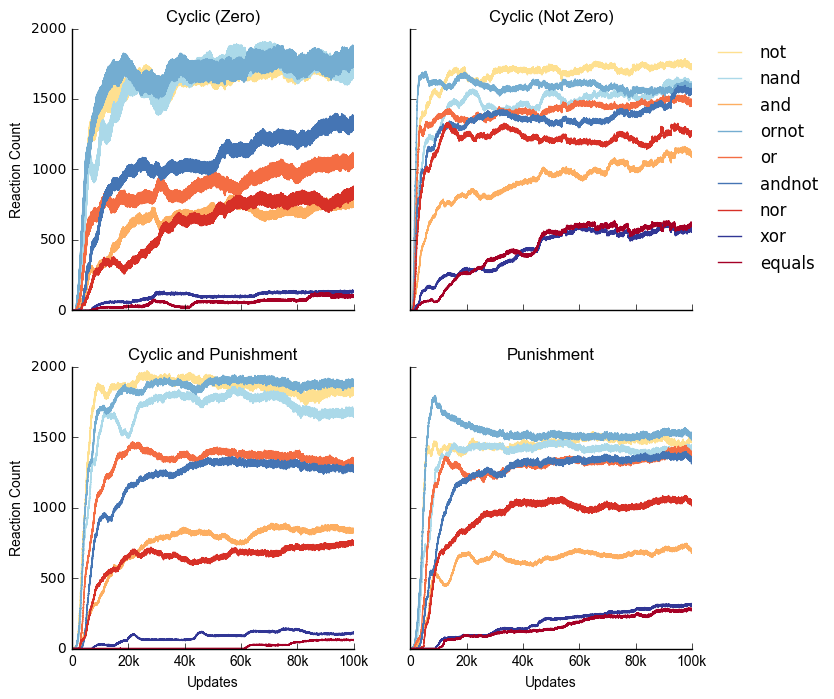

In [14]:
columns = ['update','not','nand','and','ornot','or','andnot','nor','xor','equals','']

dfs = ['reac_not', 'reac_nand', 'reac_and', 'reac_ornot', 'reac_or',
       'reac_andnot', 'reac_nor', 'reac_xor', 'reac_equals']


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row',
                                             figsize=(8,8), facecolor='white')

def clean_axes(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    
hfont = {'fontname':'Arial'}

colors = ['#fee090','#abd9e9','#fdae61','#74add1','#f46d43',
          '#4575b4','#d73027','#313695','#a50026']

##############

for reaction, df, color in zip(columns[1:-1], dfs, colors):
    globals()[df] = merge_reps(path='cyclic_zero_data', file='cur_reactions',
                               columns=columns, col=reaction, skiprows=14)

    ax1.plot(globals()[df]["update"],
             globals()[df].iloc[:,1:].mean(axis=1),
             color=color, label=reaction)
    
ax1.set_ylabel("Reaction Count", **hfont)

clean_axes(ax1)
ax1.set_title('Cyclic (Zero)', **hfont)

##############

for reaction, df, color in zip(columns[1:-1], dfs, colors):
    globals()[df] = merge_reps(path='cyclic_notzero_data', file='cur_reactions',
                               columns=columns, col=reaction, skiprows=14)

    ax2.plot(globals()[df]["update"],
             globals()[df].iloc[:,1:].mean(axis=1),
             color=color, label=reaction)

clean_axes(ax2)
ax2.set_title('Cyclic (Not Zero)', **hfont)
ax2.legend(bbox_to_anchor=(1.5, 1.), frameon=False)

##############

for reaction, df, color in zip(columns[1:-1], dfs, colors):
    globals()[df] = merge_reps(path='cyclic_punish_data', file='cur_reactions',
                               columns=columns, col=reaction, skiprows=14)

    ax3.plot(globals()[df]["update"],
             globals()[df].iloc[:,1:].mean(axis=1),
             color=color, label=reaction)
    
ax3.set_xlabel("Updates", **hfont)
ax3.set_xticklabels(['0','20k','40k','60k','80k','100k'], **hfont)
ax3.set_ylabel("Reaction Count", **hfont)

clean_axes(ax3)
ax3.set_title('Cyclic and Punishment', **hfont)

##############

for reaction, df, color in zip(columns[1:-1], dfs, colors):
    globals()[df] = merge_reps(path='punish_value_data', file='cur_reactions',
                               columns=columns, col=reaction, skiprows=14)

    ax4.plot(globals()[df]["update"],
             globals()[df].iloc[:,1:].mean(axis=1),
             color=color, label=reaction)
    
ax4.set_xlabel("Updates", **hfont)
ax4.set_xticklabels(['0','20k','40k','60k','80k','100k'], **hfont)

clean_axes(ax4)
ax4.set_title('Punishment', **hfont)

#save figure
#fig.savefig('reactions_per_env(n=50).pdf', format='pdf', bbox_inches='tight')

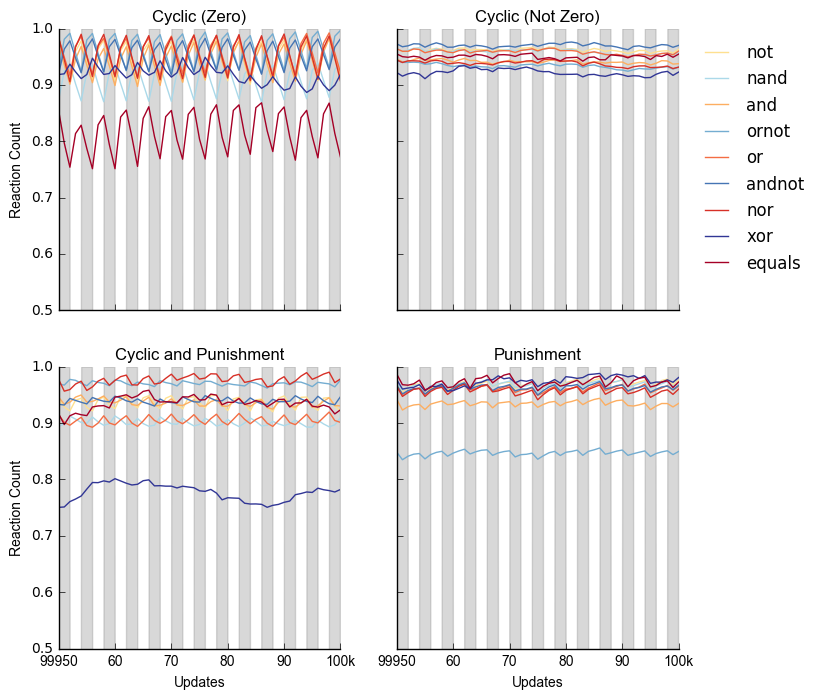

In [38]:
columns = ['update','not','nand','and','ornot','or','andnot','nor','xor','equals','']

dfs = ['reac_not', 'reac_nand', 'reac_and', 'reac_ornot', 'reac_or',
       'reac_andnot', 'reac_nor', 'reac_xor', 'reac_equals']


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row',
                                             figsize=(8,8), facecolor='white')

def clean_axes(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    
hfont = {'fontname':'Arial'}

colors = ['#fee090','#abd9e9','#fdae61','#74add1','#f46d43',
          '#4575b4','#d73027','#313695','#a50026']

night = list(np.append(np.ones(20), np.zeros(20)))*12
night.extend(list(np.ones(20)))

##############

for reaction, df, color in zip(columns[1:-1], dfs, colors):
    globals()[df] = merge_reps(path='cyclic_zero_data', file='cur_reactions',
                               columns=columns, col=reaction, skiprows=14)

    max_val = globals()[df].iloc[:,1:].mean(axis=1).max()
    
    small = globals()[df].iloc[-51:,:]

    ax1.plot(np.arange(0,len(small)),
             small.iloc[:,1:].mean(axis=1)/max_val,
             color=color, label=reaction)
    
ax1.fill_between(np.arange(0,len(night)/10,0.1), 0, night, color='grey', alpha=0.3)
ax1.set_ylabel("Reaction Count", **hfont)
ax1.set_ylim(0.5,1)

clean_axes(ax1)
ax1.set_title('Cyclic (Zero)', **hfont)

##############

for reaction, df, color in zip(columns[1:-1], dfs, colors):
    globals()[df] = merge_reps(path='cyclic_notzero_data', file='cur_reactions',
                               columns=columns, col=reaction, skiprows=14)

    max_val = globals()[df].iloc[:,1:].mean(axis=1).max()
    
    small = globals()[df].iloc[-51:,:]

    ax2.plot(np.arange(0,len(small)),
             small.iloc[:,1:].mean(axis=1)/max_val,
             color=color, label=reaction)
    
ax2.fill_between(np.arange(0,len(night)/10,0.1), 0, night, color='grey', alpha=0.3)
ax2.set_ylim(0.5,1)

clean_axes(ax2)
ax2.set_title('Cyclic (Not Zero)', **hfont)
ax2.legend(bbox_to_anchor=(1.5, 1.), frameon=False)

##############

for reaction, df, color in zip(columns[1:-1], dfs, colors):
    globals()[df] = merge_reps(path='cyclic_punish_data', file='cur_reactions',
                               columns=columns, col=reaction, skiprows=14)

    max_val = globals()[df].iloc[:,1:].mean(axis=1).max()
    
    small = globals()[df].iloc[-51:,:]

    ax3.plot(np.arange(0,len(small)),
             small.iloc[:,1:].mean(axis=1)/max_val,
             color=color, label=reaction)
    
ax3.fill_between(np.arange(0,len(night)/10,0.1), 0, night, color='grey', alpha=0.3)
ax3.set_xlabel("Updates", **hfont)
ax3.set_xticklabels(['99950','60','70','80','90','100k'], **hfont)
ax3.set_ylabel("Reaction Count", **hfont)
ax3.set_ylim(0.5,1)

clean_axes(ax3)
ax3.set_title('Cyclic and Punishment', **hfont)

##############

for reaction, df, color in zip(columns[1:-1], dfs, colors):
    globals()[df] = merge_reps(path='punish_value_data', file='cur_reactions',
                               columns=columns, col=reaction, skiprows=14)

    max_val = globals()[df].iloc[:,1:].mean(axis=1).max()
    
    small = globals()[df].iloc[-51:,:]

    ax4.plot(np.arange(0,len(small)),
             small.iloc[:,1:].mean(axis=1)/max_val,
             color=color, label=reaction)
    
ax4.fill_between(np.arange(0,len(night)/10,0.1), 0, night, color='grey', alpha=0.3) 
ax4.set_xlabel("Updates", **hfont)
ax4.set_xticklabels(['99950','60','70','80','90','100k'], **hfont)
ax4.set_ylim(0.5,1)

clean_axes(ax4)
ax4.set_title('Punishment', **hfont)

#save figure
#fig.savefig('reactions_per_env(n=50)_last50u.pdf', format='pdf', bbox_inches='tight')

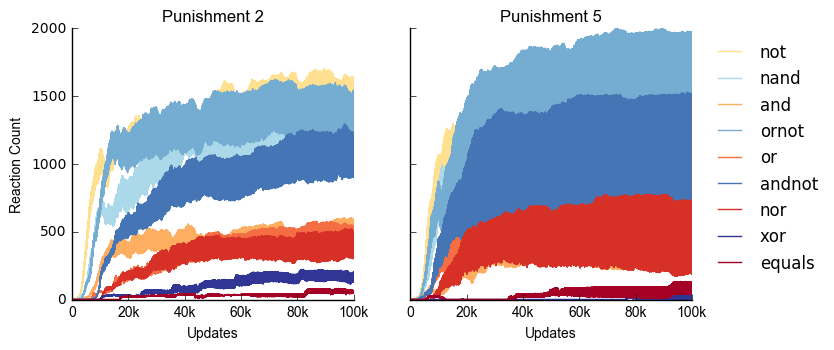

In [5]:
columns = ['update','not','nand','and','ornot','or','andnot','nor','xor','equals','']

dfs = ['reac_not', 'reac_nand', 'reac_and', 'reac_ornot', 'reac_or',
       'reac_andnot', 'reac_nor', 'reac_xor', 'reac_equals']


fig, (ax1, ax2) = plt.subplots(1, 2, sharex='col', sharey='row',
                               figsize=(8,3.5), facecolor='white')

def clean_axes(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    
hfont = {'fontname':'Arial'}

colors = ['#fee090','#abd9e9','#fdae61','#74add1','#f46d43',
          '#4575b4','#d73027','#313695','#a50026']

##############

for reaction, df, color in zip(columns[1:-1], dfs, colors):
    globals()[df] = merge_reps(path='punish_test_data', file='cur_reactions',
                               columns=columns, col=reaction, skiprows=14)

    ax1.plot(globals()[df]["update"],
             globals()[df].iloc[:,1:].mean(axis=1),
             color=color, label=reaction)
    
ax1.set_ylabel("Reaction Count", **hfont)
ax1.set_xlabel("Updates", **hfont)
ax1.set_xticklabels(['0','20k','40k','60k','80k','100k'], **hfont)

clean_axes(ax1)
ax1.set_title('Punishment 2', **hfont)

##############

for reaction, df, color in zip(columns[1:-1], dfs, colors):
    globals()[df] = merge_reps(path='punish_test_long_data', file='cur_reactions',
                               columns=columns, col=reaction, skiprows=14)

    ax2.plot(globals()[df]["update"],
             globals()[df].iloc[:,1:].mean(axis=1),
             color=color, label=reaction)

clean_axes(ax2)
ax2.set_title('Punishment 5', **hfont)
ax2.legend(bbox_to_anchor=(1.5, 1.), frameon=False)

ax2.set_xlabel("Updates", **hfont)
ax2.set_xticklabels(['0','20k','40k','60k','80k','100k'], **hfont);

#save figure
fig.savefig('reactions_2_vs_5_cycle_length(n=50).pdf', format='pdf', bbox_inches='tight')

In [7]:
columns = ['update','merit','gestation_time','fitness','repro_rate',
           '(deprecated)_size','copied_size','executed_size',
           '(deprecated)_abundance','proportion_of_organisms_that_gave_birth_in_this_update',
           'proportion_of_breed_true_organisms','(deprecated)_genotype_depth',
           'generation','neutral_metric','lineage_label',
           'true_replication_rate_(based_on_births/update_time-averaged)','']

fitness_cph = merge_reps(path='punish_test_data', file='average',
                         columns=columns, col='gestation_time', skiprows=19)

fitness_cyc_long = merge_reps(path='cyclic_test_4_data', file='average',
                              columns=columns, col='gestation_time', skiprows=19)

fitness_max = merge_reps(path='cyclic_test_10_data', file='average',
                         columns=columns, col='gestation_time', skiprows=19)

fitness_pmax = merge_reps(path='punish_test_long_data', file='average',
                         columns=columns, col='gestation_time', skiprows=19)

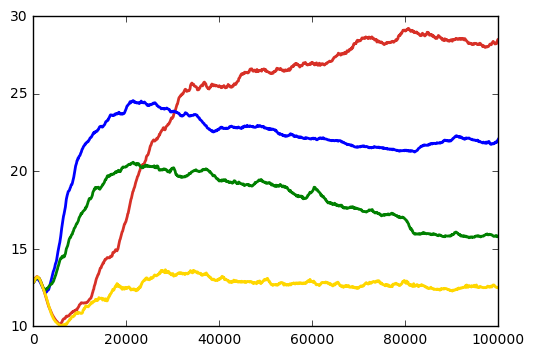

In [8]:
plt.plot(fitness_cph["update"],
         fitness_cph.iloc[:,1:].mean(axis=1)/30,
         color='red', lw=2)

plt.plot(fitness_cyc_long["update"],
         fitness_cyc_long.iloc[:,1:].mean(axis=1)/30,
         color='blue', lw=2)

plt.plot(fitness_max["update"],
         fitness_max.iloc[:,1:].mean(axis=1)/30,
         color='green', lw=2)

plt.plot(fitness_pmax["update"],
         fitness_pmax.iloc[:,1:].mean(axis=1)/30,
         color='gold', lw=2)


#plt.yscale('log')

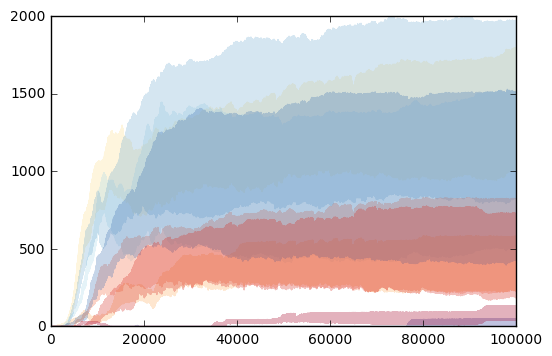

In [5]:
columns = ['update','not','nand','and','ornot','or','andnot','nor','xor','equals','']

dfs = ['reac_not', 'reac_nand', 'reac_and', 'reac_ornot', 'reac_or',
       'reac_andnot', 'reac_nor', 'reac_xor', 'reac_equals']

def clean_axes(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

colors = ['#fee090','#abd9e9','#fdae61','#74add1','#f46d43',
          '#4575b4','#d73027','#313695','#a50026']

##############

for reaction, df, color in zip(columns[1:-1], dfs, colors):
    globals()[df] = merge_reps(path='punish_test_long_data', file='cur_reactions',
                               columns=columns, col=reaction, skiprows=14)

    plt.plot(globals()[df]["update"],
             globals()[df].iloc[:,1:].mean(axis=1),
             color=color, label=reaction, alpha=0.3)
    
#plt.savefig('reactions_per_env(n=50)_punish_200k.pdf', format='pdf', bbox_inches='tight')

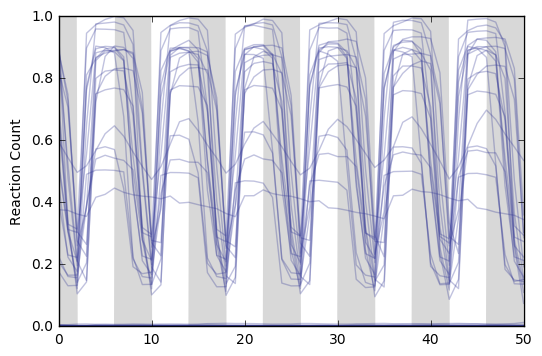

In [6]:
night = list(np.ones(20)) # for 4 step cycles
night.extend(list(np.append(np.zeros(40), np.ones(40)))*6) # for 4 step cycles

#night = list(np.append(np.zeros(50), np.ones(50)))*5 # for 5 step cycles

##############

small = reac_or.iloc[-51:,1:]
max_val = small.max().max()

plt.plot(np.arange(0,len(small)),
         small/max_val,
         color='#313695', alpha=0.3)
    
plt.fill_between(np.arange(0,len(night)/10,0.1), 0, night, color='grey', alpha=0.3, lw=0)
plt.ylabel("Reaction Count");

10


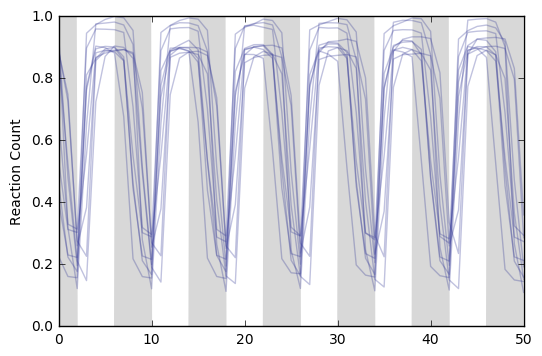

In [7]:
high = small.loc[:, small.max()/max_val > 0.9]
hc = list(high.columns)

print(len(hc))

for col in hc:
    plt.plot(np.arange(len(small)),
             small[col]/max_val,
             color='#313695', alpha=0.3)
    
plt.fill_between(np.arange(0,len(night)/10,0.1), 0, night, color='grey', alpha=0.3, lw=0)
plt.ylabel("Reaction Count");

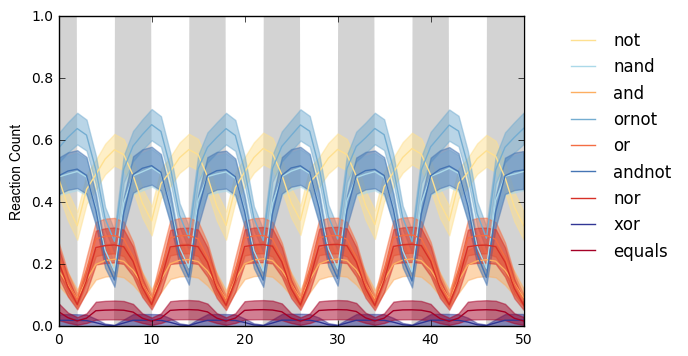

In [18]:
columns = ['update','not','nand','and','ornot','or','andnot','nor','xor','equals','']

dfs = ['reac_not', 'reac_nand', 'reac_and', 'reac_ornot', 'reac_or',
       'reac_andnot', 'reac_nor', 'reac_xor', 'reac_equals']

def clean_axes(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    
hfont = {'fontname':'Arial'}

colors = ['#fee090','#abd9e9','#fdae61','#74add1','#f46d43',
          '#4575b4','#d73027','#313695','#a50026']

##############

for reaction, df, color in zip(columns[1:-1], dfs, colors):
    
    small = globals()[df].iloc[-51:,1:]
    max_val = small.max().max()

    plt.plot(np.arange(0,len(small)),
             small.mean(axis=1)/max_val,
             color=color, label=reaction)
    
    plt.fill_between(np.arange(0,len(small)),
                     (small.mean(axis=1)-small.sem(axis=1))/max_val,
                     (small.mean(axis=1)+small.sem(axis=1))/max_val,
                     color=color, alpha=0.5)
    
plt.fill_between(np.arange(0,len(night)/10,0.1), 0, night, color='lightgrey', lw=0, zorder=-100)
plt.ylabel("Reaction Count", **hfont)
plt.ylim(0,1)
plt.legend(bbox_to_anchor=(1.35, 1.), frameon=False)
#plt.title('Cyclic (Zero)', **hfont);

plt.savefig('reactions_per_env(n=50)_punish_5_error.pdf', format='pdf', bbox_inches='tight');

not: 6
nand: 19
and: 5
ornot: 15
or: 10
andnot: 16
nor: 9
xor: 1
equals: 2


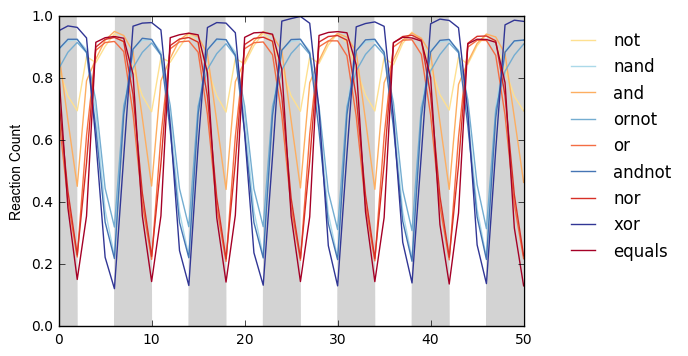

In [9]:
columns = ['update','not','nand','and','ornot','or','andnot','nor','xor','equals','']

dfs = ['reac_not', 'reac_nand', 'reac_and', 'reac_ornot', 'reac_or',
       'reac_andnot', 'reac_nor', 'reac_xor', 'reac_equals']

def clean_axes(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    
hfont = {'fontname':'Arial'}

colors = ['#fee090','#abd9e9','#fdae61','#74add1','#f46d43',
          '#4575b4','#d73027','#313695','#a50026']

##############

for reaction, df, color in zip(columns[1:-1], dfs, colors):
    
    small = globals()[df].iloc[-51:,:]
    
    df = small.iloc[:,1:].copy()
    max_val = df.max().max()
    high = df.loc[:, df.max()/max_val > 0.9]
    
    print(reaction+':',len(high.columns))

    plt.plot(np.arange(0,len(small)),
             high.mean(axis=1)/max_val,
             color=color, label=reaction)
    
plt.fill_between(np.arange(0,len(night)/10,0.1), 0, night, color='lightgrey', lw=0)
plt.ylabel("Reaction Count", **hfont)
plt.ylim(0,1)
plt.legend(bbox_to_anchor=(1.35, 1.), frameon=False)
#plt.title('Cyclic (Zero)', **hfont);

plt.savefig('reactions_per_env(n=50)_punish_5_norm.pdf', format='pdf', bbox_inches='tight');

not: 6
nand: 19
and: 5
ornot: 15
or: 10
andnot: 16
nor: 9
xor: 1
equals: 2


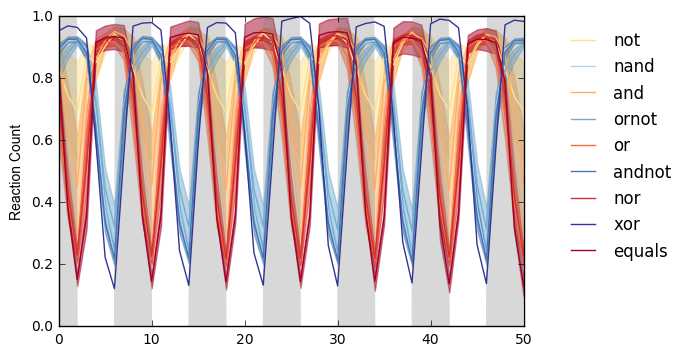

In [20]:
columns = ['update','not','nand','and','ornot','or','andnot','nor','xor','equals','']

dfs = ['reac_not', 'reac_nand', 'reac_and', 'reac_ornot', 'reac_or',
       'reac_andnot', 'reac_nor', 'reac_xor', 'reac_equals']

def clean_axes(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    
hfont = {'fontname':'Arial'}

colors = ['#fee090','#abd9e9','#fdae61','#74add1','#f46d43',
          '#4575b4','#d73027','#313695','#a50026']

##############

for reaction, df, color in zip(columns[1:-1], dfs, colors):
    
    small = globals()[df].iloc[-51:,:]
    
    df = small.iloc[:,1:].copy()
    max_val = df.max().max()
    high = df.loc[:, df.max()/max_val > 0.9]
    
    print(reaction+':',len(high.columns))

    plt.plot(np.arange(0,len(small)),
             high.mean(axis=1)/max_val,
             color=color, label=reaction)
    
    
    
    plt.fill_between(np.arange(0,len(small)),
                     (high.mean(axis=1)-high.sem(axis=1))/max_val,
                     (high.mean(axis=1)+high.sem(axis=1))/max_val,
                     color=color, alpha=0.5)
    
plt.fill_between(np.arange(0,len(night)/10,0.1), 0, night, color='grey', alpha=0.3, lw=0)
plt.ylabel("Reaction Count", **hfont)
plt.ylim(0,1)
plt.legend(bbox_to_anchor=(1.35, 1.), frameon=False)
#plt.title('Cyclic (Zero)', **hfont);

plt.savefig('reactions_per_env(n=50)_punish_5_errornorm.pdf', format='pdf', bbox_inches='tight');

/Users/nic/miniconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3569: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


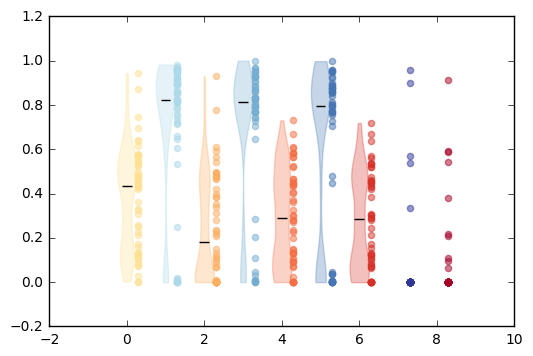

In [20]:
dfs = ['reac_not', 'reac_nand', 'reac_and', 'reac_ornot', 'reac_or',
       'reac_andnot', 'reac_nor', 'reac_xor', 'reac_equals']

pos = np.arange(9)
data = [np.array(globals()[df].iloc[-1,1:]/globals()[df].iloc[:,1:].max()) for df in dfs]

violins = plt.violinplot(data, pos, points=50, showmedians=True,
                         showextrema=False, bw_method=0.3)

for v, color in zip(violins['bodies'], colors):
    v.set_color(color)

violins['cmedians'].set_color('black')

for x,y,color in zip(pos, data, colors):
    plt.scatter([x+0.3]*len(y), y, alpha=0.5, color=color)

#plt.yscale('log')

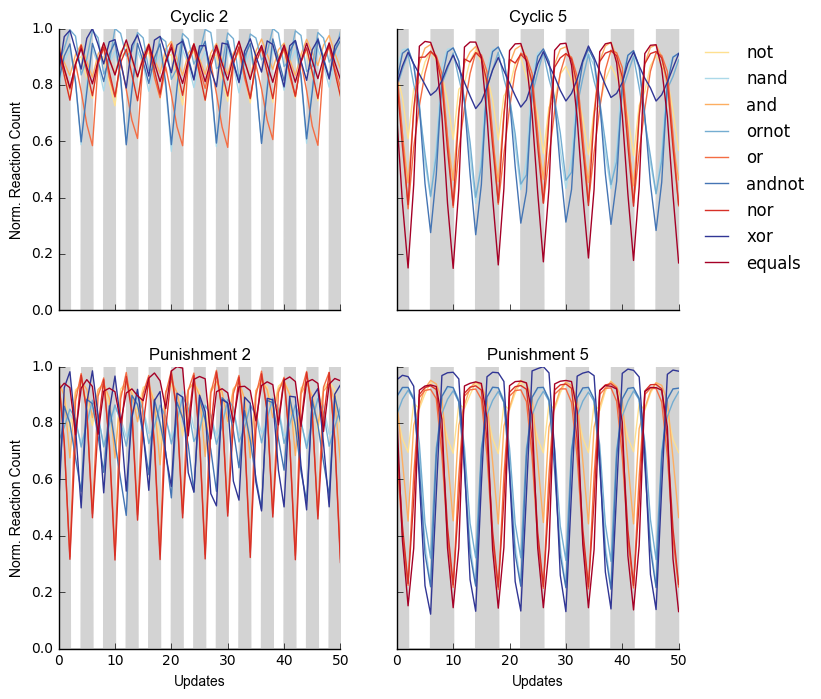

In [9]:
columns = ['update','not','nand','and','ornot','or','andnot','nor','xor','equals','']

dfs = ['reac_not', 'reac_nand', 'reac_and', 'reac_ornot', 'reac_or',
       'reac_andnot', 'reac_nor', 'reac_xor', 'reac_equals']


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row',
                                             figsize=(8,8), facecolor='white')

def clean_axes(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    
hfont = {'fontname':'Arial'}

colors = ['#fee090','#abd9e9','#fdae61','#74add1','#f46d43',
          '#4575b4','#d73027','#313695','#a50026']

step_2 = list(np.ones(20))
step_2.extend(list(np.append(np.zeros(20), np.ones(20)))*12)

step_4 = list(np.ones(20))
step_4.extend(list(np.append(np.zeros(40), np.ones(40)))*6)

##############

for reaction, df, color in zip(columns[1:-1], dfs, colors):
    globals()[df] = merge_reps(path='cyclic_test_4_data', file='cur_reactions',
                               columns=columns, col=reaction, skiprows=14)
    
    small = globals()[df].iloc[-51:,:]
    
    df = small.iloc[:,1:].copy()
    max_val = df.max().max()
    high = df.loc[:, df.max()/max_val > 0.9]

    ax1.plot(np.arange(0,len(small)),
             high.mean(axis=1)/max_val,
             color=color, label=reaction)
    
ax1.fill_between(np.arange(0,len(step_2)/10,0.1), 0, step_2, color='lightgrey')  
ax1.set_ylabel("Norm. Reaction Count", **hfont)
ax1.set_ylim(0,1)

clean_axes(ax1)
ax1.set_title('Cyclic 2', **hfont)

##############

for reaction, df, color in zip(columns[1:-1], dfs, colors):
    globals()[df] = merge_reps(path='cyclic_test_8_data', file='cur_reactions',
                               columns=columns, col=reaction, skiprows=14)
    
    small = globals()[df].iloc[-51:,:]
    
    df = small.iloc[:,1:].copy()
    max_val = df.max().max()
    high = df.loc[:, df.max()/max_val > 0.9]

    ax2.plot(np.arange(0,len(small)),
             high.mean(axis=1)/max_val,
             color=color, label=reaction)

ax2.fill_between(np.arange(0,len(step_4)/10,0.1), 0, step_4, color='lightgrey')
ax2.set_ylim(0,1)

clean_axes(ax2)
ax2.set_title('Cyclic 5', **hfont)
ax2.legend(bbox_to_anchor=(1.5, 1.), frameon=False)

##############

for reaction, df, color in zip(columns[1:-1], dfs, colors):
    globals()[df] = merge_reps(path='punish_test_data', file='cur_reactions',
                               columns=columns, col=reaction, skiprows=14)
    
    small = globals()[df].iloc[-51:,:]
    
    df = small.iloc[:,1:].copy()
    max_val = df.max().max()
    high = df.loc[:, df.max()/max_val > 0.9]

    ax3.plot(np.arange(0,len(small)),
             high.mean(axis=1)/max_val,
             color=color, label=reaction)
    
ax3.fill_between(np.arange(0,len(step_2)/10,0.1), 0, step_2, color='lightgrey')
ax3.set_xlabel("Updates", **hfont)
ax3.set_ylabel("Norm. Reaction Count", **hfont)
ax3.set_ylim(0,1)

clean_axes(ax3)
ax3.set_title('Punishment 2', **hfont)

##############

for reaction, df, color in zip(columns[1:-1], dfs, colors):
    
    globals()[df] = merge_reps(path='punish_test_long_data', file='cur_reactions',
                               columns=columns, col=reaction, skiprows=14)
    
    small = globals()[df].iloc[-51:,:]
    
    df = small.iloc[:,1:].copy()
    max_val = df.max().max()
    high = df.loc[:, df.max()/max_val > 0.9]

    ax4.plot(np.arange(0,len(small)),
             high.mean(axis=1)/max_val,
             color=color, label=reaction)

ax4.fill_between(np.arange(0,len(step_4)/10,0.1), 0, step_4, color='lightgrey')  
ax4.set_xlabel("Updates", **hfont)
ax4.set_ylim(0,1)

clean_axes(ax4)
ax4.set_title('Punishment 5', **hfont)

#save figure
#fig.savefig('cyclic_punish.pdf', format='pdf', bbox_inches='tight');

In [119]:
columns = ['update','cue','day','night','']

df_res = pd.read_table('../data/punish_value_longer_data/run-1-resource.dat',
                           delimiter=' ', skiprows=9, header=None)

df_res.columns = columns
df_res = df_res.dropna(axis=1)

df_res.tail()

,update,cue,day,night
199996,199996,1,1,1
199997,199997,0,1,1
199998,199998,0,1,1
199999,199999,0,1,1
200000,200000,0,1,1


In [120]:
small = df_res.iloc[-51:,1:]

(-0.1, 1.1)

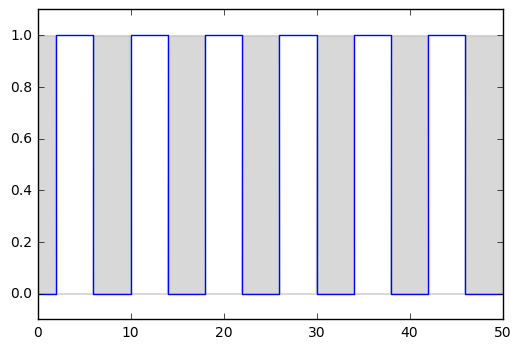

In [124]:
step_5 = list(np.append(np.zeros(50), np.ones(50)))*5

step_4 = list(np.ones(20))
step_4.extend(list(np.append(np.zeros(40), np.ones(40)))*6)

plt.fill_between(np.arange(0,len(step_4)/10,0.1), 0, step_4, color='lightgrey')

plt.step(range(len(small)), small.cue)
plt.ylim(-0.1,1.1)

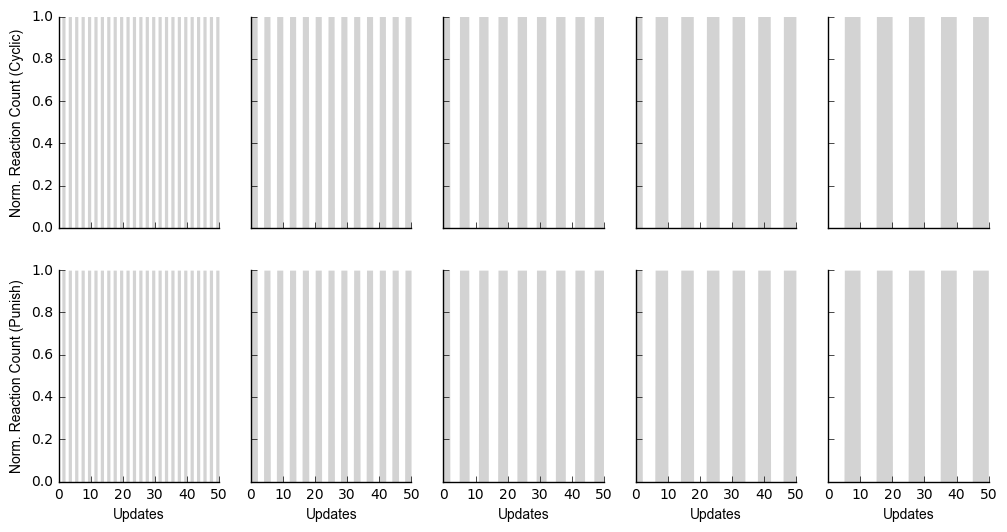

In [86]:
fig, ax = plt.subplots(2, 5, sharex='col', sharey='row',
                       figsize=(12,6), facecolor='white')

def clean_axes(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    
hfont = {'fontname':'Arial'}

colors = ['#fee090','#abd9e9','#fdae61','#74add1','#f46d43',
          '#4575b4','#d73027','#313695','#a50026']

ax[1][0].set_xlabel('Updates', **hfont)
ax[1][1].set_xlabel('Updates', **hfont)
ax[1][2].set_xlabel('Updates', **hfont)
ax[1][3].set_xlabel('Updates', **hfont)
ax[1][4].set_xlabel('Updates', **hfont)        
        
ax[0][0].set_ylabel('Norm. Reaction Count (Cyclic)', **hfont)
ax[1][0].set_ylabel('Norm. Reaction Count (Punish)', **hfont)

night = [[]]

step_1 = list(np.append(np.zeros(100), np.ones(100)))*25
#night.append(step_1)
step_2 = list(np.ones(20))
step_2.extend(list(np.append(np.zeros(20), np.ones(20)))*12)
night.append(step_2)
step_3 = list(np.ones(20))
step_3.extend(list(np.append(np.zeros(30), np.ones(30)))*8)
night.append(step_3)
step_4 = list(np.ones(20))
step_4.extend(list(np.append(np.zeros(40), np.ones(40)))*6)
night.append(step_4)
step_5 = list(np.append(np.zeros(50), np.ones(50)))*5
night.append(step_5)



for line in ax:
    line[0].fill_between(np.arange(0,len(step_1)/100,0.01), 0, step_1, color='lightgrey', lw=0)
    
    for plot, n in zip(line, night):
        clean_axes(plot)
        plot.fill_between(np.arange(0,len(n)/10,0.1), 0, n, color='lightgrey', lw=0)
        
        
for plot in ax[0]:
    continue

for plot in ax[1]:
    continue
        
fig.savefig('test.pdf', format='pdf', bbox_inches='tight')